# CS156_Assignment1
## Yuhao

## Question1. Moore's Law

### 1. Extract the date and base speed for a benchmark of your choice

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn import linear_model

# Import data
f = open('benchmarks.txt','r')
date=[]
data=[]
line=0

# Extract data
while True:
    textline=f.readline()
    if textline:
        line+=1
        if line!=1:
            lineresult=textline.split(',')
            if lineresult[0][0]!='p' and lineresult[0].split('-')[1][0]!='9' and lineresult[1] == '456.hmmer':
                date.append(((datetime.datetime.strptime(lineresult[0].split('-')[1], '%Y%m%d')-datetime.datetime.strptime('19990104', '%Y%m%d')).days)/365)
                data.append(lineresult[2])
    else:
        break

# Clear date so that there will be only one speed at one day
current_date=0
datalist=[]
newdate=[]
newdata=[]
for i in range(len(date)):
    if current_date==0:
        current_date=date[i]
        datalist.append(float(data[i]))
    else:
        if date[i]==current_date:
            datalist.append(float(data[i]))
        else:
            newdate.append(current_date)
            newdata.append(np.mean(datalist))
            current_date=0
            datalist=[]
newdate.append(current_date)
newdata.append(np.mean(datalist))

### 2. Plot the data in a semi-log plot

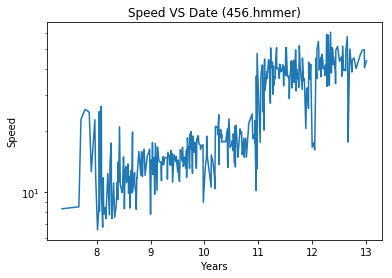

In [50]:
# Plot the semilog plot to show the trend of speeds of 456.hmmer
plt.semilogy(newdate, newdata)
plt.title('Speed VS Date (456.hmmer)')
plt.xlabel('Years')
plt.ylabel('Speed')
plt.show()

### 3. Now train a linear model to fit your plot.

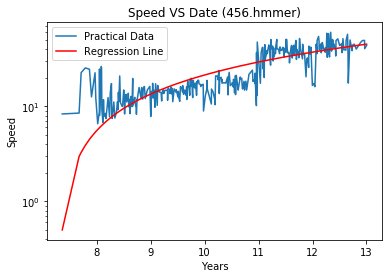

In [51]:
# Train regression model
regr = linear_model.LinearRegression()
regr.fit(np.array(newdate).reshape(-1, 1), newdata)

# Plot the comparisons between practical data and the regression line
plt.semilogy(newdate, newdata, label='Practical Data')
plt.plot(newdate, regr.predict(np.array(newdate).reshape(-1,1)), color='red', label='Regression Line')
plt.title('Speed VS Date (456.hmmer)')
plt.xlabel('Years')
plt.ylabel('Speed')
plt.legend()
plt.show()

### 4. How well is Moore’s law holding up?

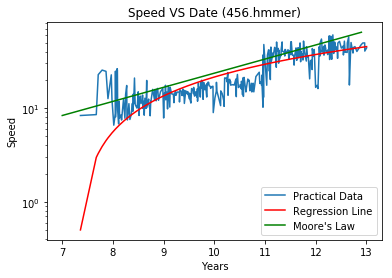

In [52]:
# Get the relationship between x and y axises in the Moore's Law
m1=np.arange(7, 13, 0.1)
m2=newdata[0]*(2**((m1-7)/2))

# Draw the comparison plot
plt.semilogy(newdate, newdata, label='Practical Data')
plt.plot(newdate, regr.predict(np.array(newdate).reshape(-1,1)), color='red', label='Regression Line')
plt.plot(m1,m2,color='green', label="Moore's Law")
plt.title('Speed VS Date (456.hmmer)')
plt.xlabel('Years')
plt.ylabel('Speed')
plt.legend()
plt.show()

From the graph, we can see that the regression line fits the Moore's Law's curve overall. Therefore, we could say that the Moore's Law manage to predict the developing speed of technology.

## Question2. MNIST Digits

###  1. Using Scikit.learn, load the MNIST digits (See here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
digits = datasets.load_digits()

### 2. Plot some of the examples.

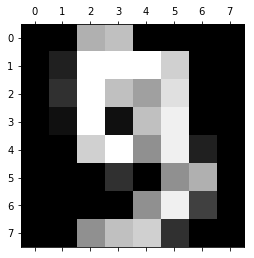

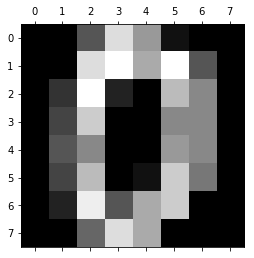

In [4]:
# Plot number 9 and 0
plt.gray()
plt.matshow(digits.images[9])
plt.matshow(digits.images[0])
plt.show()

### 3. Choose two digit classes (e.g 7s and 3s) , and train a k-nearest neighbor classifier.

In [5]:
# Choose digit classes 3s and 9s
datas=digits.data
targets=digits.target
indexs=[]
for i in range(len(targets)):
    if targets[i]==3 or targets[i]==9:
        indexs.append(i)
datas=datas[indexs]
targets=targets[indexs]

# Separate the Training and Testing set
trainData, testData, trainLabels, testLabels = train_test_split(datas, targets, test_size=0.20, random_state=55)

# Using k-fold crossing Validation
cv = KFold(n_splits=10)

# Set k from 1 to 20 and get the accuracies of the k-neighbors-classifier model
accuracies = []
klist=[]

for k in range(1,20):
    score=[]
    for train, test in cv.split(datas, targets):
        trainData, testData = datas[train], datas[test]
        trainLabel, testLabel = targets[train], targets[test]
        model_new = KNeighborsClassifier(n_neighbors=k)
        model_new.fit(trainData, trainLabel)
        predictLabel = model_new.predict(testData)
        score.append(accuracy_score(testLabel, predictLabel))
    accuracies.append(np.mean(score))
    klist.append(k)

# find the value of k that has the largest accuracy
k = np.argmax(accuracies)
print("k=%d has the highest accuracy of %.2f%%" % (klist[k],accuracies[k] * 100))

k=7 has the highest accuracy of 99.44%


### 4. Report your error rates on a held out part of the data.

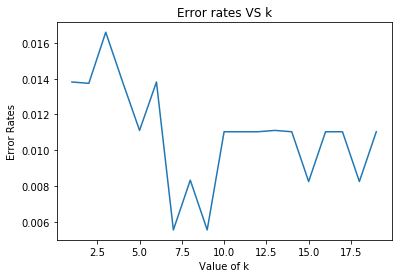

In [56]:
# Plot the error rates
errors=[]
for i in accuracies:
    errors.append(1-i)
plt.plot(klist,errors)
plt.xlabel("Value of k")
plt.ylabel("Error Rates")
plt.title("Error rates VS k")
plt.show()